In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
df = pd.read_csv(r'D:\Learn Python for Data Analysis\PYTHON_EXERCISES_LUKE\job_postings_flat_from_luke.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

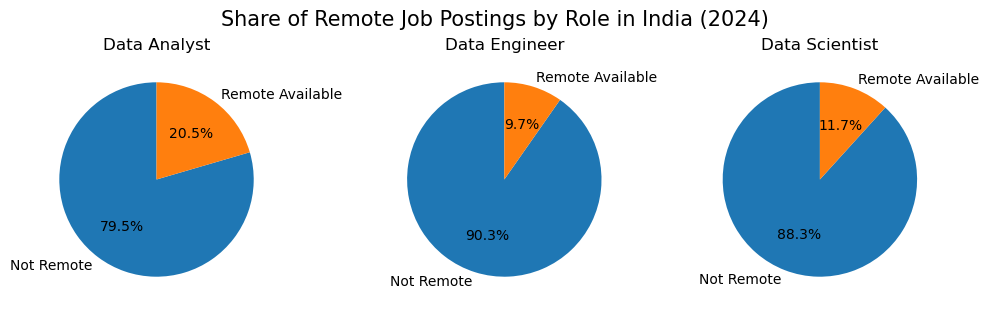

In [ ]:
job_roles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_2024_IN = df.query(
    "job_posted_date.dt.year == 2024 and job_title_short.isin(@job_roles) and job_country == 'India'"
)

fig, ax = plt.subplots(1, 3, figsize=(10,3), constrained_layout=True)

for i, role in enumerate(job_roles):
    wfh_count = df_2024_IN[df_2024_IN['job_title_short'] == role]['job_work_from_home'].value_counts().reindex([False, True], fill_value=0)
    ax[i].pie(wfh_count, startangle=90, labels=['Not Remote', 'Remote Available'], autopct='%1.1f%%')
    ax[i].set_title(role)

fig.suptitle('Share of Remote Job Postings by Role in India (2024)', fontsize=15)
plt.show()